In [1]:
import pandas as pd

In [8]:
# data is loaded in the vscode now first step is to do 
data=pd.read_csv('Space Dataset.csv')

In [11]:
# There are total of 8693 rows and 14 columns 
data.shape

(8693, 14)

In [14]:
# therer are total of 7 object rows , 6 float and 1 bool (true and false colmns )
data.dtypes.value_counts()

object     7
float64    6
bool       1
dtype: int64

In [15]:
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [18]:
# We have to divide the data into 4 stages Plan Analyse Construct and Execute 

In [17]:
# As for the below information some of the columns can be dropped as there should be no data leakage 
# Drop Passenger_id and Name columns and name the data as data_churn so that if there is need to return to to analize stage we can 
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
# New data_chrun have 12 columns now 
data_churn=data.drop(labels=['PassengerId','Name'],axis=1)

In [21]:
data_churn.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [22]:
import numpy as np

In [26]:
# OK, there are total 6560 type of cabin which cannot be encoded and can be dropped as well
# There are total 3 home planets 
# 2 Crysleeps 
# 3 Destinations 
# 2 VIP
data_churn.select_dtypes(include='object').nunique()

HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
dtype: int64

In [27]:
# cabin column is dropped and now we have 11 columns 
data_churn=data_churn.drop(columns=['Cabin'],axis=1)

In [28]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [32]:
# next step is to check for duplicates and null values , as duplicated should have been done in the start we have analized as per the old untouched data 
data[data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


In [33]:
# Null Values 
data_churn.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

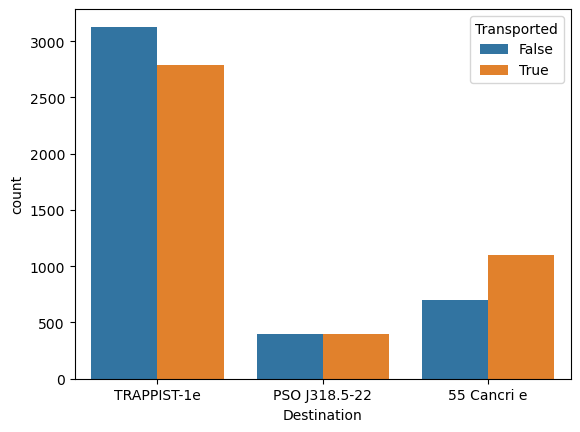

In [41]:
#there are lot of null values in the data and all cannot be dropped 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x=data_churn['Destination'],hue='Transported',data=data_churn)


In [42]:
data_churn.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

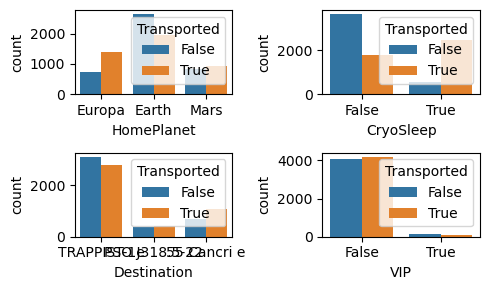

In [51]:
cat_col=['HomePlanet','CryoSleep','Destination','VIP']

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(5,3))
axs=axs.flatten()
for i ,var in enumerate(cat_col):
    sns.countplot(x=var,hue='Transported',ax=axs[i],data=data_churn)
fig.tight_layout()

([<matplotlib.patches.Wedge at 0x141d4af85b0>,
 [Text(-0.14445288072599838, 1.0904739177302503, '4602'),
  Text(-0.5456478714190157, -0.955127426271436, '2131'),
  Text(0.8752009735838737, -0.6663507003356715, '1759')],
 [Text(-0.0787924803959991, 0.594803955125591, '54.2%'),
  Text(-0.29762611168309944, -0.520978596148056, '25.1%'),
  Text(0.47738234922756745, -0.36346401836491166, '20.7%')])

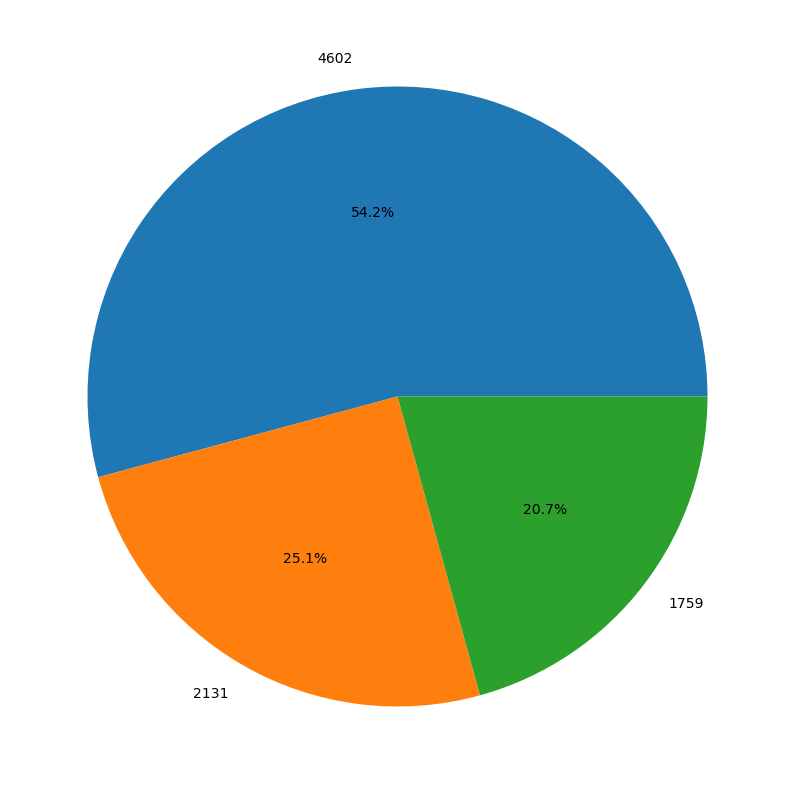

In [56]:
plt.figure(figsize=(10,12))
plt.pie(data_churn['HomePlanet'].value_counts(),labels=data_churn['HomePlanet'].value_counts(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x141d4a77c10>,
 [Text(-1.0970190325929705, 0.08092738800173493, '8291'),
  Text(1.097019030698728, -0.08092741367931887, '199')],
 [Text(-0.5983740177779838, 0.044142211637309955, '97.7%'),
  Text(0.5983740167447607, -0.04414222564326484, '2.3%')])

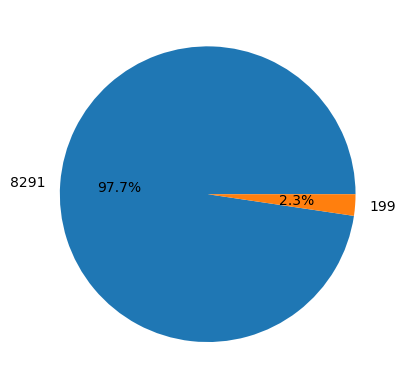

In [60]:
plt.pie(data_churn['VIP'].value_counts(),labels=data_churn['VIP'].value_counts(),autopct='%1.1f%%')

<AxesSubplot:>

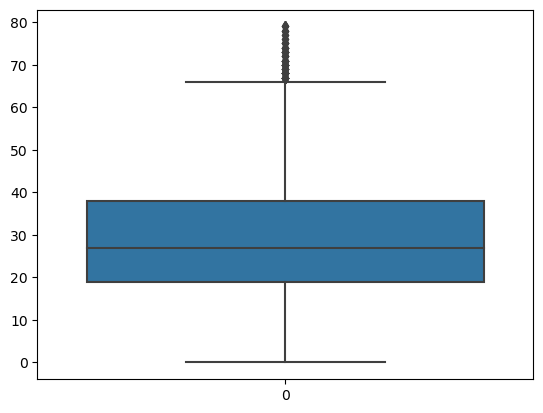

In [65]:
sns.boxplot(data_churn['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

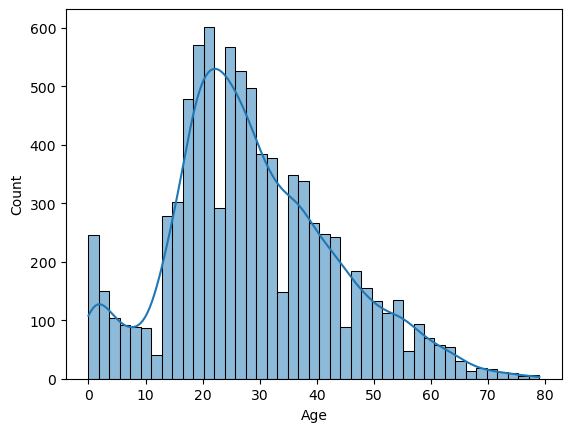

In [68]:
# There seems to be a lot of data at 20-40 
sns.histplot(data_churn['Age'],kde=True)

In [70]:
# the mean,mode,median and std is present for analization
# as per below data some of the age is 0 which is unborn i guess 
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [74]:
# percentage of data missing of the total data of each column 
# As per the below data only some part of the data is missing and can be dropped and further analised 
missing=data_churn.isnull().sum() * 100/data_churn.shape[0]
missing

HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64

In [76]:
# All the null values are dropped and can be checked for shape of the data 
data_churn_1=data_churn.dropna()

In [78]:
data_churn_1.shape

(6923, 11)

In [79]:
data_churn_1.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [81]:
str_col=['HomePlanet','CryoSleep','Destination','VIP']

In [83]:
data_churn_1[str_col].nunique()

HomePlanet     3
CryoSleep      2
Destination    3
VIP            2
dtype: int64

In [84]:
# now we can encode the data at once for all the object type
for i in data_churn_1.select_dtypes(include='object').columns:
    print(data_churn_1[i].unique())

['Europa' 'Earth' 'Mars']
[False True]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False True]


In [89]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for i in data_churn_1.select_dtypes(include='object').columns:
    label_enc.fit(data_churn_1[i].unique())
    data_churn_1[i]=label_enc.transform(data_churn_1[i])


C:\Users\hp\AppData\Local\Temp\ipykernel_7652\1917089318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_churn_1[i]=label_enc.transform(data_churn_1[i])


In [90]:
data_churn_1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [99]:
data_churn_1['HomePlanet'].unique()

array([1, 0, 2])

In [100]:
data_churn_1.dtypes

HomePlanet        int32
CryoSleep         int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

<AxesSubplot:>

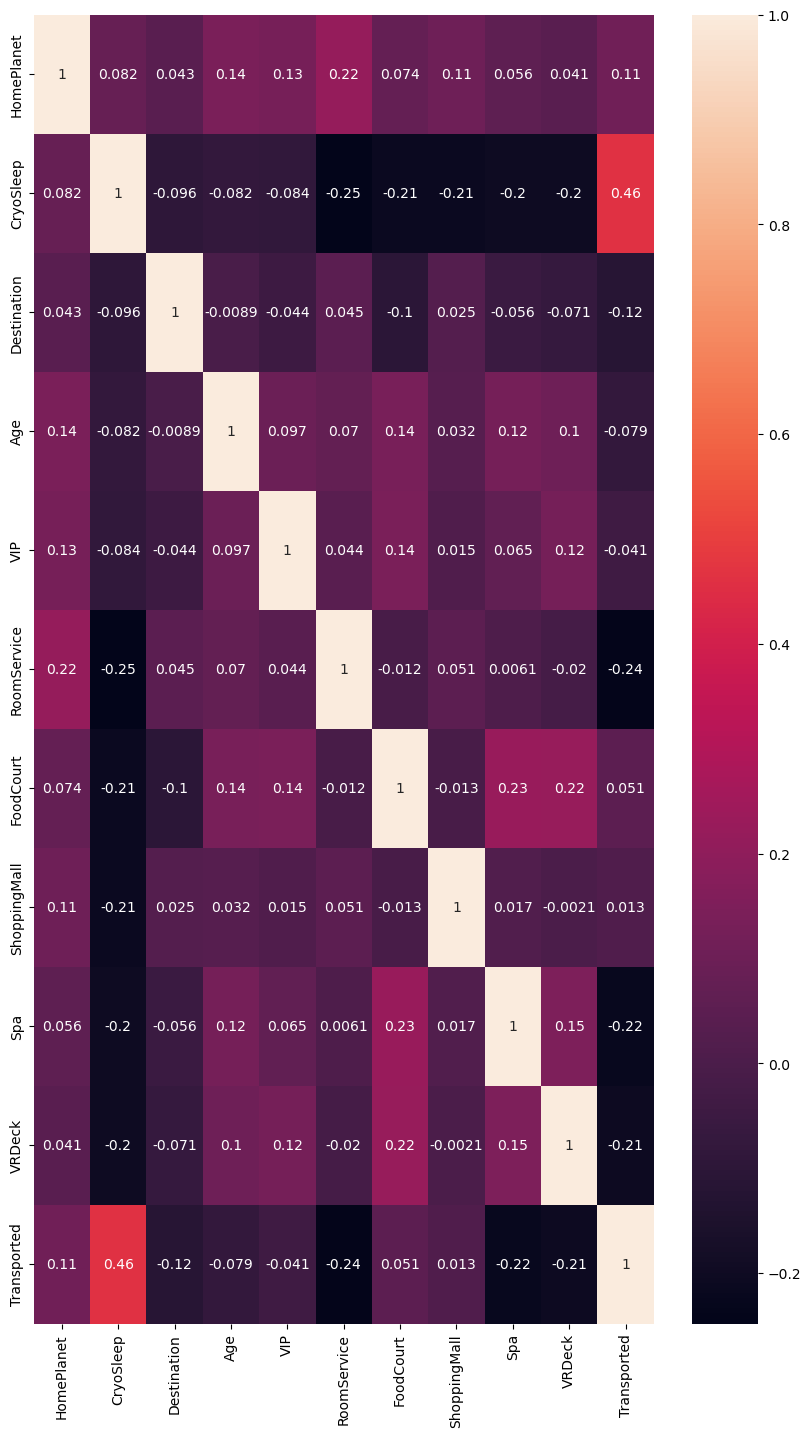

In [103]:
corelation=data_churn_1.corr()
plt.figure(figsize=(10,17))
sns.heatmap(corelation,annot=True)

In [104]:
data_churn_1.head(
    
)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [108]:
data_churn_2=pd.get_dummies(data_churn_1,drop_first=True)

In [110]:
data_churn_2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [114]:
# Lets perform the train Test split 
X=data_churn_1.iloc[:,:-1]
y=data_churn_1.iloc[:,-1]

In [115]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0


In [116]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6923, dtype: bool

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [136]:
# most important removing the outliers 
from scipy import stats
selected_clos=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

In [137]:
Q1=X_train[selected_clos].quantile(0.25)
Q3=X_train[selected_clos].quantile(0.75)
IQR=Q3-Q1

threshold=1.5

outlier_indices=((X_train[selected_clos] < (Q1- threshold *IQR)) | (X_train[selected_clos] >(Q3 + threshold * IQR))).any(axis=1)

In [138]:
X_train_1=X_train[~outlier_indices]
y_train_1=y_train[~outlier_indices]

In [139]:
X_train_1.shape

(1911, 10)

In [142]:
from sklearn.ensemble import AdaBoostClassifier
cls=AdaBoostClassifier()
cls.fit(X_train_1,y_train_1)
y_pred=cls.predict(X_test)

In [144]:
cls.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [147]:
from sklearn.metrics import precision_score,f1_score,accuracy_score,roc_curve,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(roc_curve(y_test,y_pred))

[[524 629]
 [224 908]]
0.5907612231620039
0.680404645934807
(array([0.        , 0.54553339, 1.        ]), array([0.        , 0.80212014, 1.        ]), array([2, 1, 0]))


In [146]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
for i in data_churn_1.select_dtypes(include='object').columns:
    label_enc.fit(data_churn_1[i].unique())
    data_churn_1[i]=label_enc.transform(data_churn_1[i])


In [148]:
from sklearn.tree import DecisionTreeClassifier
dec_cls=DecisionTreeClassifier()
dec_cls.fit(X_train_1,y_train_1)
y_pred_1=dec_cls.predict(X_test)

In [150]:
print(confusion_matrix(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))
print(f1_score(y_test,y_pred_1))
print(roc_curve(y_test,y_pred_1))

[[571 582]
 [267 865]]
0.5977885279889427
0.670802636680884
(array([0.        , 0.50477016, 1.        ]), array([0.        , 0.76413428, 1.        ]), array([2, 1, 0]))


In [151]:
# lets try to scale the data 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_scaled=std.fit_transform(X_train_1)
X_test_scaled=std.transform(X_test)

In [152]:
cls.fit(X_train_scaled,y_train)
y_pred_new=cls.predict(X_test_scaled)

ValueError: Found input variables with inconsistent numbers of samples: [1911, 4638]